# Machine Learning Engineer Nanodegree
   # Capaston Project: Machine Learning in The Education Process

----
## Exploring the Data
The second data set was originally used in research made at the University of Jordan. It contains information
about 480 students from various countries, mostly in the Middle East. The data has a total of 16 variables. The
features are classified into three main categories: (1) Demographic features. (2) Academic background features.
(3) Behavioral features.
[Link to dataset](https://www.kaggle.com/aljarah/xAPI-Edu-Data)

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

In [2]:
# Importing the dataset
data = pd.read_csv('xAPI-Edu-Data.csv')

print ("Student Data read succefully !!")

display(data.head())
print('Total number of students:',len(data))

Student Data read succefully !!


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


Total number of students: 480


# Class(Our target) 

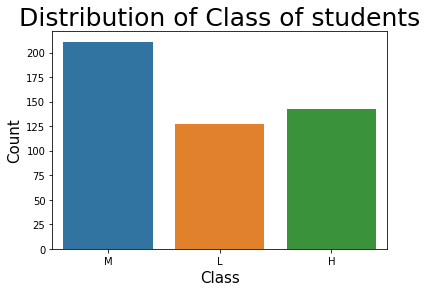

In [3]:
# Allows the use of display() for DataFrames
b = sns.countplot(data['Class'])
b.axes.set_title('Distribution of Class of students', fontsize = 25)
b.set_xlabel('Class', fontsize = 15)
b.set_ylabel('Count', fontsize = 15)
plt.show()

## checking null values

In [4]:
data.isnull().any()

gender                      False
NationalITy                 False
PlaceofBirth                False
StageID                     False
GradeID                     False
SectionID                   False
Topic                       False
Semester                    False
Relation                    False
raisedhands                 False
VisITedResources            False
AnnouncementsView           False
Discussion                  False
ParentAnsweringSurvey       False
ParentschoolSatisfaction    False
StudentAbsenceDays          False
Class                       False
dtype: bool

## Visualize Feature Distributions & Correlation

C:\Users\Shady\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


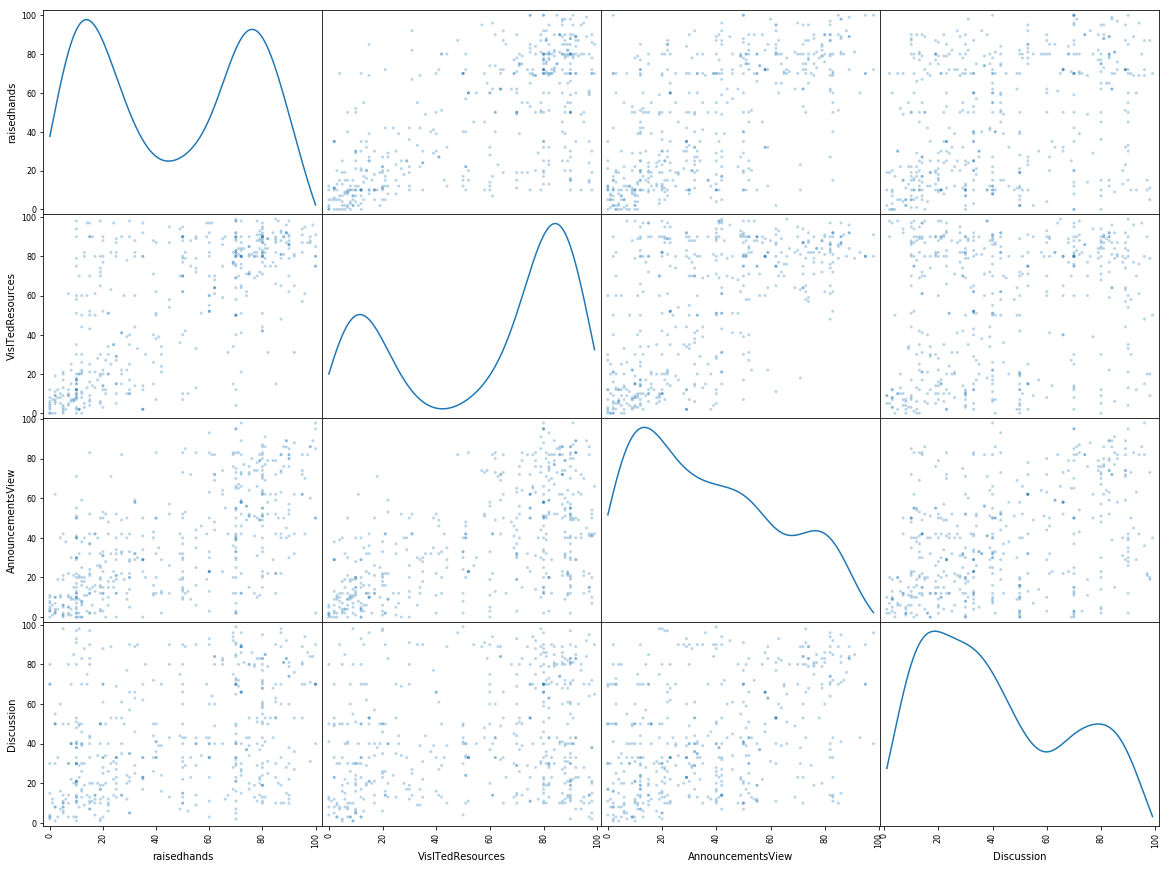

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (20,15), diagonal = 'kde');

In [5]:
df = pd.DataFrame(data)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1,0.691572,0.643918,0.339386
VisITedResources,0.691572,1,0.5945,0.243292
AnnouncementsView,0.643918,0.5945,1,0.41729
Discussion,0.339386,0.243292,0.41729,1


### Implementation: Data Preparation
- no null values
- tranformation
From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. 

## Applying one hot encoding

In [6]:
# selecting the most correlated values and dropping the others
labels = data['Class']

# drop the school and grade columns
student = data.drop(['Class'], axis='columns')  
# One-Hot Encoding of Categorical Variables
student = pd.get_dummies(student)
# Print the number of features after one-hot encoding
encoded = list(student.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
# Uncomment the following line to see the encoded feature names
print (encoded)

72 total features after one-hot encoding.
['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'gender_F', 'gender_M', 'NationalITy_Egypt', 'NationalITy_Iran', 'NationalITy_Iraq', 'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia', 'NationalITy_Morocco', 'NationalITy_Palestine', 'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis', 'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela', 'PlaceofBirth_Egypt', 'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan', 'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco', 'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia', 'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA', 'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'StageID_HighSchool', 'StageID_MiddleSchool', 'StageID_lowerlevel', 'GradeID_G-02', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06', 'GradeID_G-07', 'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10', 'GradeID_G-11', 'GradeID_G-12', 'Sectio

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y= LabelEncoder()
y= labelencoder_y.fit_transform(labels)

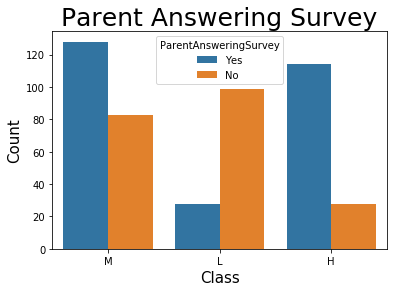

In [9]:
b = sns.countplot('Class',hue='ParentAnsweringSurvey', data=data)
b.axes.set_title('Parent Answering Survey',fontsize=25)
b.set_xlabel("Class",fontsize=15)
b.set_ylabel("Count",fontsize=15)
plt.show()

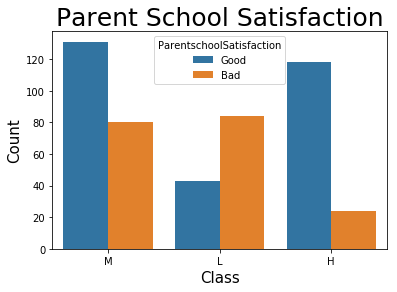

In [10]:
b = sns.countplot('Class',hue='ParentschoolSatisfaction', data=data)
b.axes.set_title('Parent School Satisfaction',fontsize=25)
b.set_xlabel("Class",fontsize=15)
b.set_ylabel("Count",fontsize=15)
plt.show()

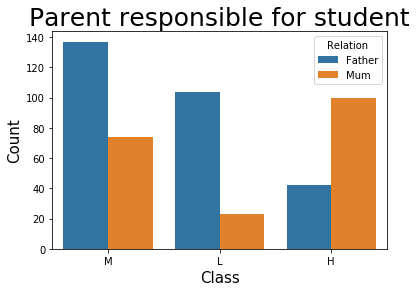

In [11]:
b = sns.countplot('Class',hue='Relation', data=data)
b.axes.set_title('Parent responsible for student',fontsize=25)
b.set_xlabel("Class",fontsize=15)
b.set_ylabel("Count",fontsize=15)
plt.show()

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [9]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Split the 'features' and 'Class' data into training and testing sets
X_train1, X_test1, y_train1, y_test1= train_test_split(student,y, test_size= 0.2, random_state= 0) 

#  Data without family features
df2=pd.DataFrame(student)
list_to_remove=['Relation_Father', 'Relation_Mum', 'ParentAnsweringSurvey_No', 'ParentAnsweringSurvey_Yes', 'ParentschoolSatisfaction_Bad', 'ParentschoolSatisfaction_Good']
samples_fam = list(set(encoded).difference(set(list_to_remove)))
student2=df2[samples_fam]
X_train2, X_test2, y_train2, y_test2 = train_test_split(student2,y,test_size = 0.2,random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train1.shape[0]))
print("Testing set has {} samples.".format(X_test1.shape[0]))

Training set has 384 samples.
Testing set has 96 samples.


## Import ML Models & Evaluation Metrics

In [10]:
from time import time
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
# Metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score,accuracy_score,precision_score, recall_score,f1_score 

# Distributions
import scipy

## Modeling

In [11]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
       # Names of models
    model_name_list = ['GaussianNB','SVM','Neural Network','RandomForest','GradientBoosting','LogisticRegression']
 
    # Instantiate the models
  
    model1 = GaussianNB()
    model2 = SVC(kernel = 'linear', random_state = 0)
    model3 = MLPClassifier(activation='relu')
    model4 = RandomForestClassifier(random_state=40)
    model5 = GradientBoostingClassifier(random_state=40)
    model6 = LogisticRegression(random_state=40)
   
    # Dataframe for results
    results = pd.DataFrame(columns=['acc_train','acc_test','f1_score_train','f1_score_test','precision_S','recall_S'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        start = time() 
        model.fit(X_train, y_train)
        end = time()
        predictions_train = model.predict(X_train)
        predictions_test = model.predict(X_test)
         
        # Metrics
        acc_train = accuracy_score(y_train,predictions_train)
        acc_test = accuracy_score(y_test,predictions_test)
        f1_score_train=f1_score(y_train,predictions_train, average='weighted')
        f1_score_test=f1_score(y_test,predictions_test, average='weighted')
        precision_S = precision_score(y_test, predictions_test,average='weighted')
        recall_S = recall_score(y_test, predictions_test, average='weighted')
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        
        results.loc[model_name, :] = [acc_train,acc_test,f1_score_train,f1_score_test,precision_S,recall_S]
        
    
    return results

## Run evaluate function code with full dataset

In [12]:
results1 = evaluate(X_train1, X_test1, y_train1, y_test1)
results1

C:\Users\Shady\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Shady\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Shady\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shady\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,acc_train,acc_test,f1_score_train,f1_score_test,precision_S,recall_S
GaussianNB,0.661458,0.583333,0.647295,0.575243,0.60345,0.583333
SVM,0.841146,0.75,0.841285,0.746954,0.746006,0.75
Neural Network,0.940104,0.760417,0.940089,0.755375,0.760972,0.760417
RandomForest,0.994792,0.760417,0.994801,0.756926,0.771081,0.760417
GradientBoosting,0.994792,0.8125,0.994792,0.810803,0.810291,0.8125
LogisticRegression,0.828125,0.6875,0.827656,0.673927,0.674893,0.6875


## Run evaluate function code without family features

In [13]:
results2 = evaluate(X_train2, X_test2, y_train2, y_test2)
results2

C:\Users\Shady\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Shady\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Shady\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shady\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,acc_train,acc_test,f1_score_train,f1_score_test,precision_S,recall_S
GaussianNB,0.627604,0.479167,0.609104,0.45892,0.490992,0.479167
SVM,0.8125,0.697917,0.812938,0.690055,0.691181,0.697917
Neural Network,0.90625,0.677083,0.906153,0.672789,0.67029,0.677083
RandomForest,0.986979,0.677083,0.986962,0.669249,0.685499,0.677083
GradientBoosting,0.981771,0.760417,0.981736,0.755367,0.755867,0.760417
LogisticRegression,0.768229,0.645833,0.767592,0.629573,0.625809,0.645833


## Merging & Visualizing Results 

In [14]:
All_results = pd.merge(results1, results2,right_index=True, left_index=True)
All_results

,acc_train_x,acc_test_x,f1_score_train_x,f1_score_test_x,precision_S_x,recall_S_x,acc_train_y,acc_test_y,f1_score_train_y,f1_score_test_y,precision_S_y,recall_S_y
GaussianNB,0.661458,0.583333,0.647295,0.575243,0.60345,0.583333,0.627604,0.479167,0.609104,0.45892,0.490992,0.479167
SVM,0.841146,0.75,0.841285,0.746954,0.746006,0.75,0.8125,0.697917,0.812938,0.690055,0.691181,0.697917
Neural Network,0.940104,0.760417,0.940089,0.755375,0.760972,0.760417,0.90625,0.677083,0.906153,0.672789,0.67029,0.677083
RandomForest,0.994792,0.760417,0.994801,0.756926,0.771081,0.760417,0.986979,0.677083,0.986962,0.669249,0.685499,0.677083
GradientBoosting,0.994792,0.8125,0.994792,0.810803,0.810291,0.8125,0.981771,0.760417,0.981736,0.755367,0.755867,0.760417
LogisticRegression,0.828125,0.6875,0.827656,0.673927,0.674893,0.6875,0.768229,0.645833,0.767592,0.629573,0.625809,0.645833


In [15]:
#All_results.rename(columns={"acc_train_x": "RMSE_All_Data", "acc_test_x	": "Time_All_Data","rmse_y": "RMSE_Family_Data", "time_period_y": "Time_Family_Data"}, inplace = True)
All_results.rename(columns={"acc_train_x":"acc_train_All","acc_test_x":"acc_test_All","f1_score_train_x":"f1_score_train_All","f1_score_test_x":"f1_score_test_All","precision_S_x":"precision_All","recall_S_x":"recall_All","acc_train_y":"acc_train_WFF","acc_test_y":"acc_test_WFF","f1_score_train_y":"f1_score_train_WFF","f1_score_test_y":"f1_score_test_WFF","precision_S_y":"precision_WFF","recall_S_y":"Recall_WFF"}, inplace = True)
All_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, GaussianNB to LogisticRegression
Data columns (total 12 columns):
acc_train_All         6 non-null object
acc_test_All          6 non-null object
f1_score_train_All    6 non-null object
f1_score_test_All     6 non-null object
precision_All         6 non-null object
recall_All            6 non-null object
acc_train_WFF         6 non-null object
acc_test_WFF          6 non-null object
f1_score_train_WFF    6 non-null object
f1_score_test_WFF     6 non-null object
precision_WFF         6 non-null object
Recall_WFF            6 non-null object
dtypes: object(12)
memory usage: 624.0+ bytes


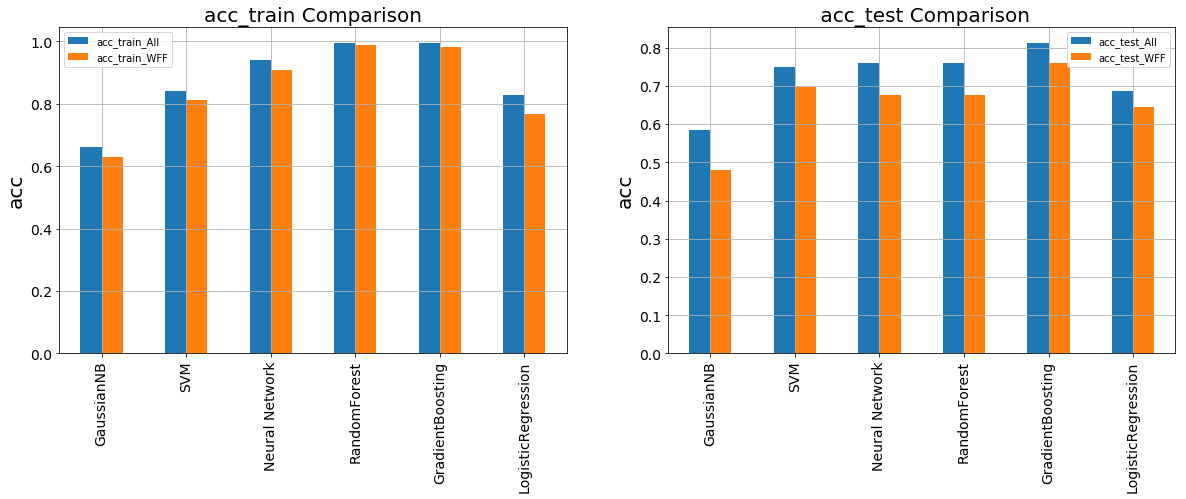

In [16]:
plt.figure(figsize=(20, 6))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
All_results.plot.bar(y=['acc_train_All', 'acc_train_WFF'],ax = ax, grid=True,fontsize=14)
plt.title('acc_train Comparison', fontsize=20) 
plt.ylabel('acc', fontsize=20)

# Time Period
ax = plt.subplot(1, 2, 2)
All_results.plot.bar(y=['acc_test_All', 'acc_test_WFF'],ax = ax, grid=True,fontsize=14)
plt.title(' acc_test Comparison', fontsize=20) 
plt.ylabel('acc',fontsize=20)
plt.show()

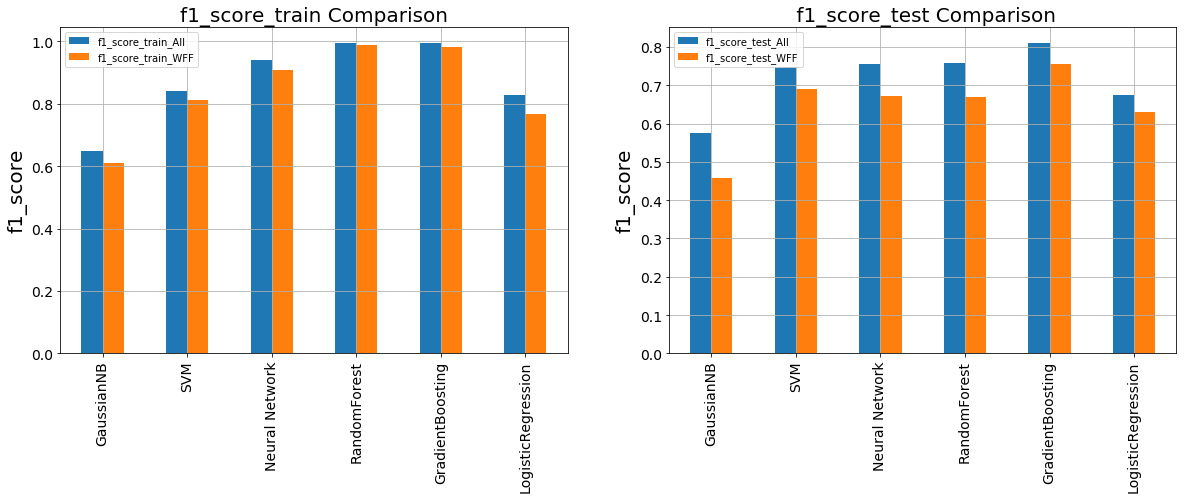

In [17]:
plt.figure(figsize=(20, 6))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
All_results.plot.bar(y=['f1_score_train_All', 'f1_score_train_WFF'],ax = ax, grid=True,fontsize=14)
plt.title('f1_score_train Comparison', fontsize=20) 
plt.ylabel('f1_score', fontsize=20)

# Time Period
ax = plt.subplot(1, 2, 2)
All_results.plot.bar(y=['f1_score_test_All', 'f1_score_test_WFF'],ax = ax, grid=True,fontsize=14)
plt.title(' f1_score_test Comparison', fontsize=20) 
plt.ylabel('f1_score',fontsize=20)
plt.show()

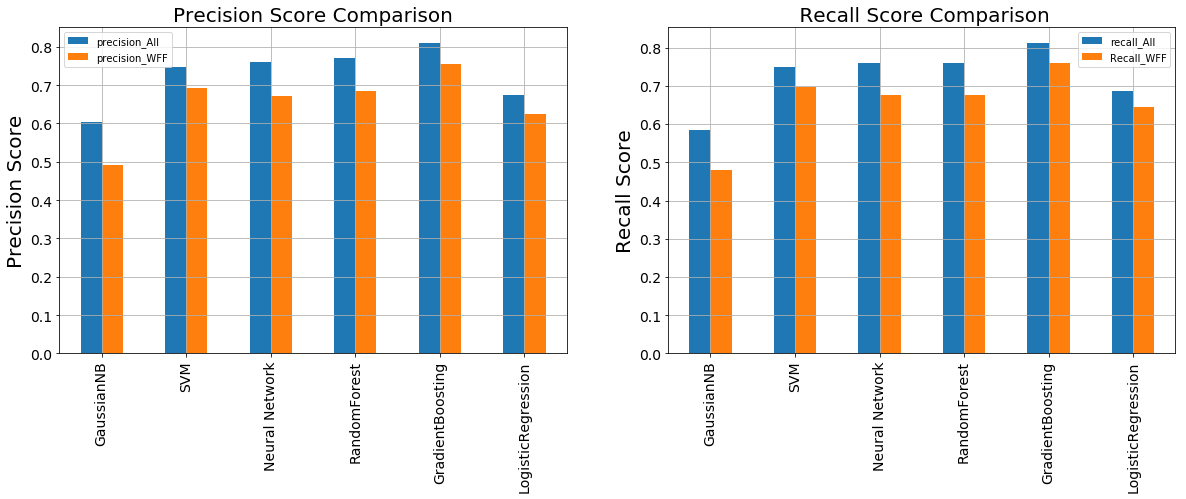

In [18]:
plt.figure(figsize=(20, 6))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
All_results.plot.bar(y=['precision_All', 'precision_WFF'],ax = ax, grid=True,fontsize=14)
plt.title('Precision Score Comparison', fontsize=20) 
plt.ylabel('Precision Score', fontsize=20)

# Time Period
ax = plt.subplot(1, 2, 2)
All_results.plot.bar(y=['recall_All', 'Recall_WFF'],ax = ax, grid=True,fontsize=14)
plt.title(' Recall Score Comparison', fontsize=20) 
plt.ylabel('Recall Score',fontsize=20)
plt.show()